In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import sin, cos

In [46]:
names = ['A','Bb','B','C','Db','D','Eb','E','F','Gb','G','Ab']
all_notes = {}
for i in range(120):
    all_notes[names[i%12] + str(i//12)] = (i, round(27.5*2**(i/12),4))
#Anything above A8 is not very musical
# https://www.szynalski.com/tone-generator/
N = {}
for i in range(96):
    N[names[i%12] + str(i//12)] = (i, round(27.5*2**(i/12),4))
# print(N)
Nk = list(N.keys())
# print(Nk)

In [47]:
all_notes

{'A0': (0, 27.5),
 'Bb0': (1, 29.1352),
 'B0': (2, 30.8677),
 'C0': (3, 32.7032),
 'Db0': (4, 34.6478),
 'D0': (5, 36.7081),
 'Eb0': (6, 38.8909),
 'E0': (7, 41.2034),
 'F0': (8, 43.6535),
 'Gb0': (9, 46.2493),
 'G0': (10, 48.9994),
 'Ab0': (11, 51.9131),
 'A1': (12, 55.0),
 'Bb1': (13, 58.2705),
 'B1': (14, 61.7354),
 'C1': (15, 65.4064),
 'Db1': (16, 69.2957),
 'D1': (17, 73.4162),
 'Eb1': (18, 77.7817),
 'E1': (19, 82.4069),
 'F1': (20, 87.3071),
 'Gb1': (21, 92.4986),
 'G1': (22, 97.9989),
 'Ab1': (23, 103.8262),
 'A2': (24, 110.0),
 'Bb2': (25, 116.5409),
 'B2': (26, 123.4708),
 'C2': (27, 130.8128),
 'Db2': (28, 138.5913),
 'D2': (29, 146.8324),
 'Eb2': (30, 155.5635),
 'E2': (31, 164.8138),
 'F2': (32, 174.6141),
 'Gb2': (33, 184.9972),
 'G2': (34, 195.9977),
 'Ab2': (35, 207.6523),
 'A3': (36, 220.0),
 'Bb3': (37, 233.0819),
 'B3': (38, 246.9417),
 'C3': (39, 261.6256),
 'Db3': (40, 277.1826),
 'D3': (41, 293.6648),
 'Eb3': (42, 311.127),
 'E3': (43, 329.6276),
 'F3': (44, 349.

In [48]:
def major(note):
    idx = names.index(note)
    steps = [0, 2, 4, 5, 7, 9, 11, 12]
    return [names[(idx + s)%12] for s in steps]

def natural_minor(note):
    idx = names.index(note)
    steps = [0, 2, 3, 5, 7, 8, 10, 12]
    return [names[(idx + s)%12] for s in steps]

def harmonic_minor(note):
    idx = names.index(note)
    steps = [0, 2, 3, 5, 7, 8, 11, 12]
    return [names[(idx + s)%12] for s in steps]

def major_chord(note):
    m = major_scale(note)
    return (m[0], m[2], m[4])

In [49]:
def gen_sin_wave(f, t, b = 2, s = 44100):
    #f = frequency of wave
    #t = amount of time to generate sample (in milliseconds)
    #s = samples per second
    #b = bytes per sample
    freq = (6.28318530718 * f)/(s)
    arr_len = int(s * (t/1000))
    scale = 2**((b * 8)-1)
    dom = np.arange(0, arr_len * freq, freq)
    return (scale * np.sin(dom)).astype(np.int64)
#     return np.array([int(scale * sin(freq * i)) for i in range(arr_len)])

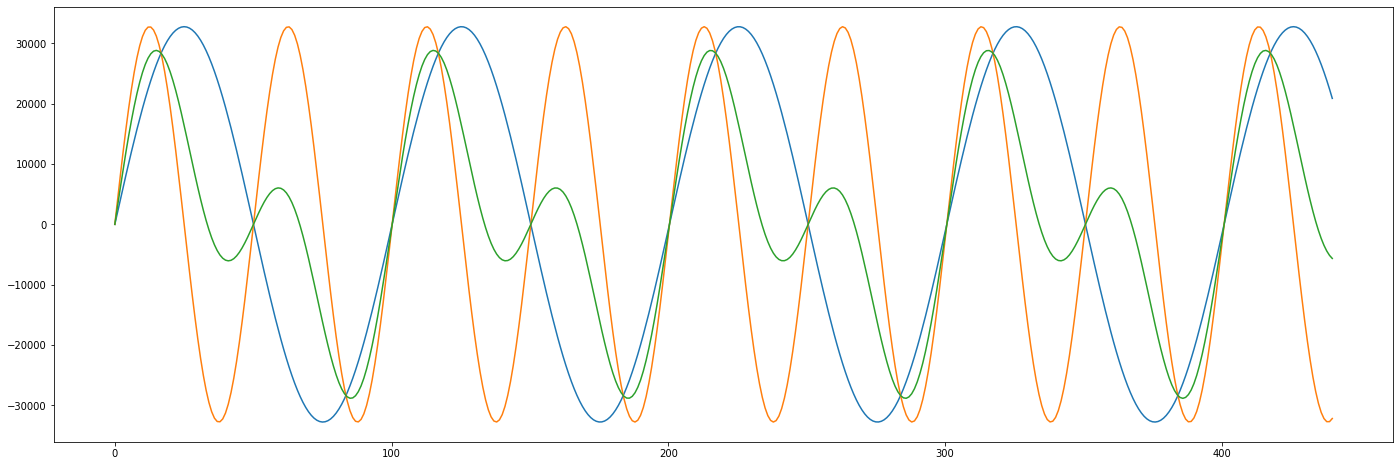

In [50]:
plt.figure(figsize=(24,8))
A4 = gen_sin_wave(N['A4'][1], 10)
plt.plot(A4)
A5 = gen_sin_wave(N['A5'][1], 10)
plt.plot(A5)
octave = (A4 + A5)//2
plt.plot(octave)

1323

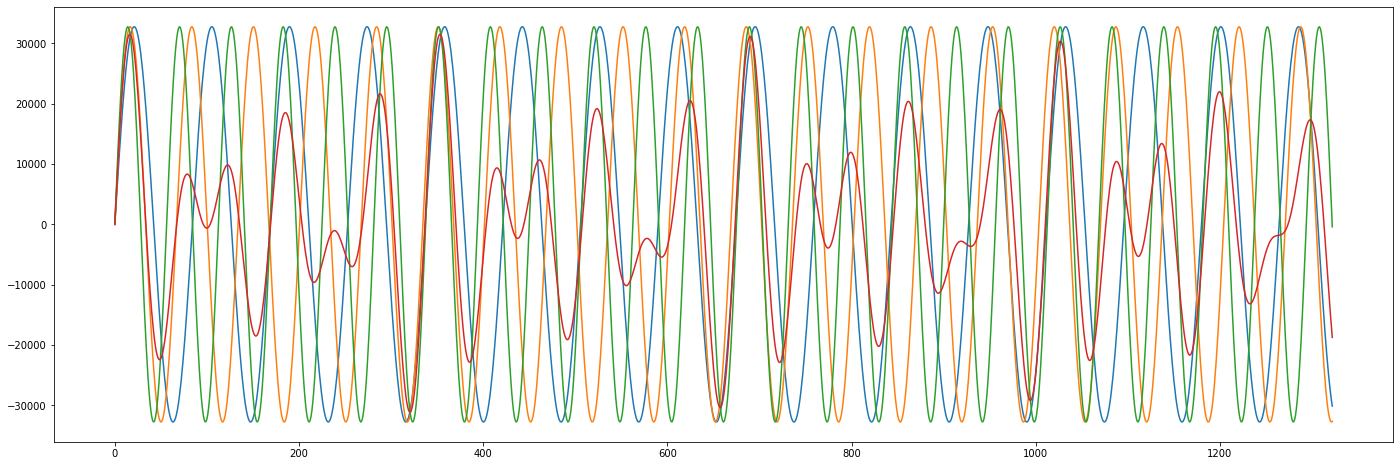

In [51]:
C = gen_sin_wave(N['C4'][1], 30)
E = gen_sin_wave(N['E4'][1], 30)
F = gen_sin_wave(N['F3'][1], 30)
G = gen_sin_wave(N['G4'][1], 30)
maj = (C + (E//2) + G)//2.5
fourth = (C + F)//2
plt.figure(figsize=(24,8))
plt.plot(C)
plt.plot(E)
plt.plot(G)
plt.plot(maj)
len(maj)

In [8]:
def dot_note(note, sample, s_rate=44100):
    l = len(sample)
    ret = 0
    reti = 0
    freq = (6.28318530718 * N[note][1])/s_rate
    for i in range(l):
        ret += sin(i * freq) * sample[i]
        reti += cos(i * freq) * sample[i]
    return (ret**2 + reti**2)

In [9]:
dot_note('G4', maj)

68450319999579.766

In [10]:
ifft = [dot_note(n, maj) for n in list(N.keys())]

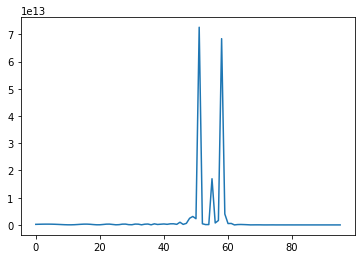

In [11]:
plt.plot(ifft)

In [45]:
maj = (C + E//2 + G)//2.5
maj2 = maj[157:]
maj2 += (np.random.rand(len(maj2)) * 32000).astype(np.int64)
maj2 = maj2.astype(np.int64)
len(maj2)

NameError: name 'C' is not defined

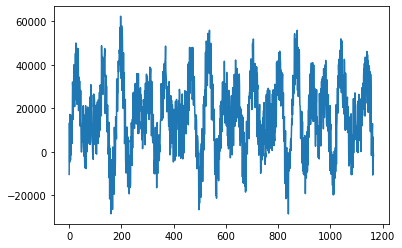

In [13]:
plt.plot(maj2)

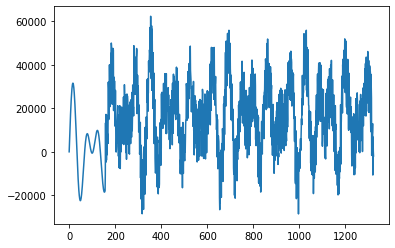

In [14]:
plt.plot(maj)

In [18]:
ifft = [int(dot_note(n, maj2)) for n in list(N.keys())[24:96]]

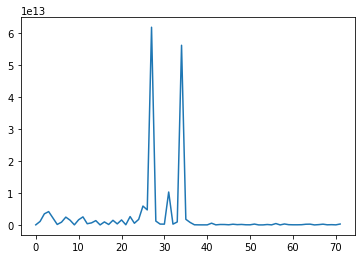

In [19]:
plt.plot(ifft)

In [9]:
microtones = []
# A0 -> A8
# 48 tones per octave (increase by 2**(1/48)th)
for i in range(8 * 48): #3 * 128
    microtones.append(27.5 * 2**(i/48))

In [10]:
microtones

[27.5,
 27.899996710781902,
 28.30581150769603,
 28.71752901675388,
 29.13523509488062,
 29.55901684781915,
 29.988962648294585,
 30.42516215444292,
 30.867706328507758,
 31.316687455809017,
 31.772199163987505,
 32.23433644252942,
 32.70319566257483,
 33.17887459701435,
 33.66147244087802,
 34.15108983202081,
 34.64782887210901,
 35.15179314791184,
 35.66308775290277,
 36.18181930917503,
 36.70809598967595,
 37.242027540764546,
 37.78372530509745,
 38.33330224484748,
 38.890872965260115,
 39.45655373855251,
 40.03046252816015,
 40.61271901333623,
 41.20344461410874,
 41.80276251660066,
 42.41079769871837,
 43.02767695621379,
 43.653528929125486,
 44.288484128604495,
 44.93267496413025,
 45.5862357711224,
 46.2493028389543,
 46.922014439373854,
 47.604510855337864,
 48.296934410265735,
 48.99942949771866,
 49.71214261151055,
 50.43522237625692,
 51.168819578368065,
 51.91308719749314,
 52.66818043842155,
 53.434256763448325,
 54.211475925210316,
 55.0,
 55.79999342156379,
 56.611623015

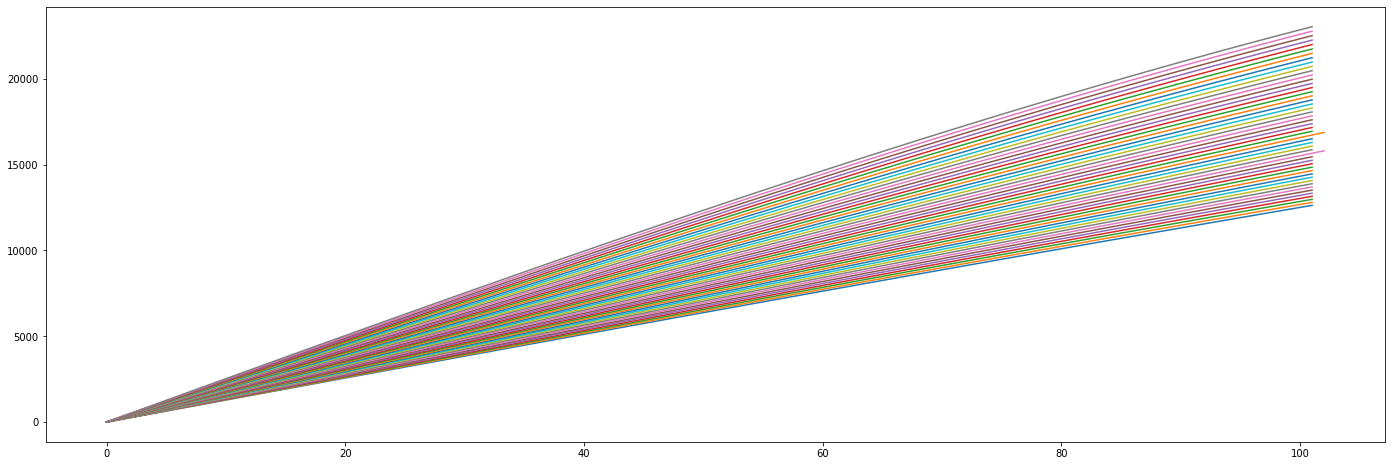

In [26]:
window = 1024
plt.figure(figsize=(24,8))
for tone in microtones[:48]:
    plt.plot(np.sin())

In [43]:
2 * np.pi * 27.5/44100 # = 1603 -> 1603 samples for a full cycles
sin(2 * np.pi * 27.5/44100)
sin(1203 * 2 * np.pi * 27.5/44100)

-0.9999994290802755

In [83]:
def dot2(freq, sample, s_rate=44100):
    l = len(sample)
    freq = (6.28318530718 * freq)/s_rate #2pi * cycles/second / samples/second = 2pi * cycles/sample
    rad_in = np.arange(0, l*freq, freq)[:l]
    s = np.sin(rad_in)
    c = np.cos(rad_in)
    ret = np.dot(s, sample)
    reti = np.dot(c, sample)
    return (ret**2 + reti**2)**(1/2)

In [84]:
maj[:1024]

array([    0.,  3051.,  6074., ..., 25801., 27219., 28385.])

In [85]:
fft = [int(dot2(microtone, maj[:1024])) for microtone in microtones]

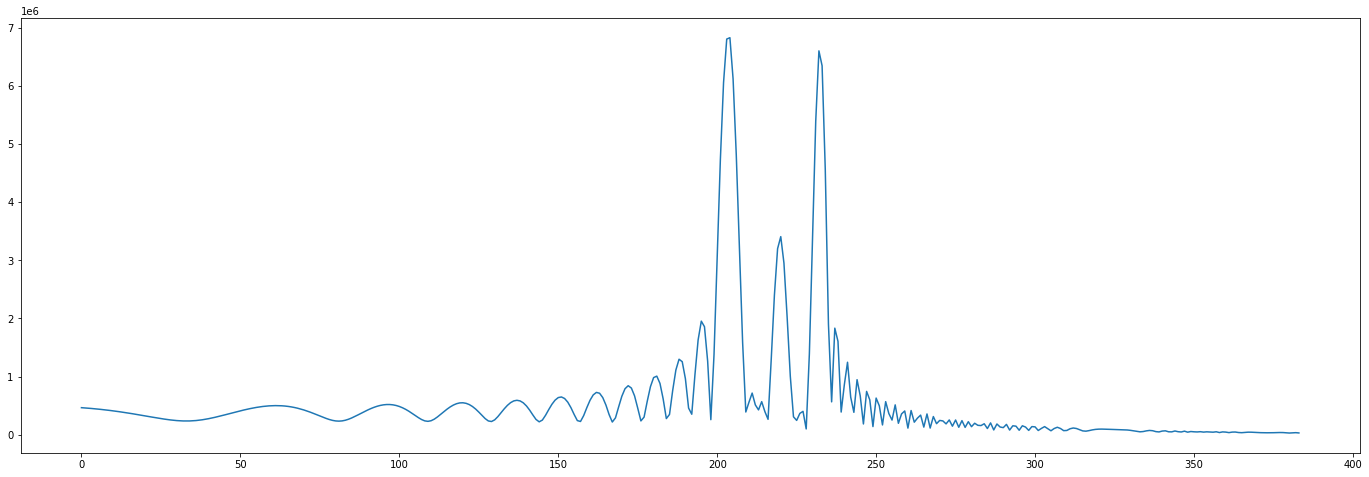

In [107]:
plt.figure(figsize=(24,8))
plt.plot(fft)

In [91]:
from scipy.fft import rfft

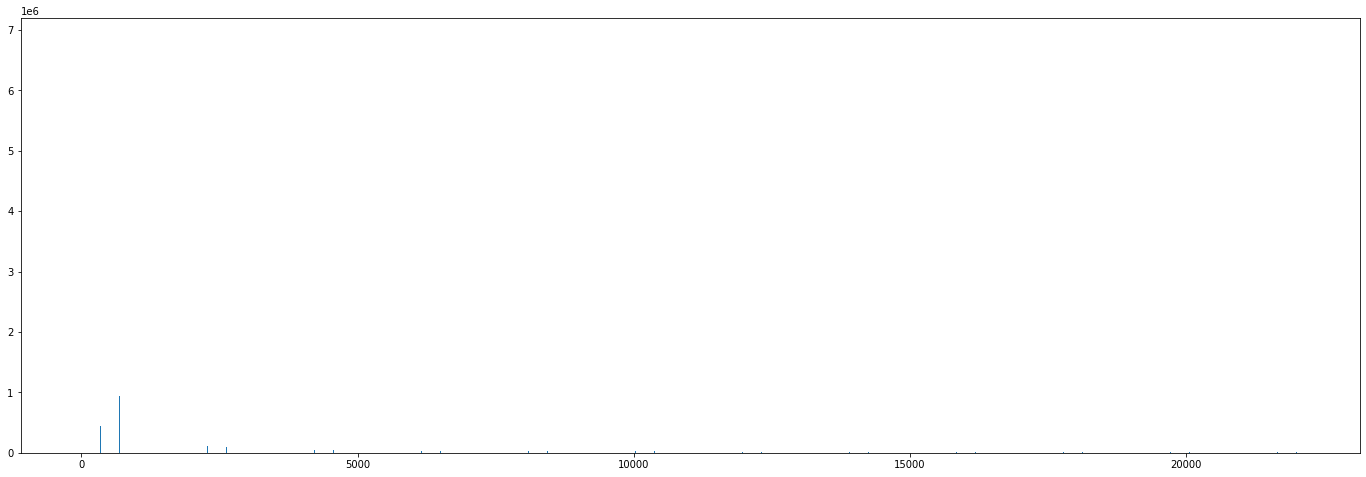

In [103]:
plt.figure(figsize=(24,8))
plt.bar([i * (44100/1024) for i in range(513)] , np.abs(rfft(maj[:1024])))
plt.show()

In [104]:
for i in range(513):
    print(i * 44100/1024)

0.0
43.06640625
86.1328125
129.19921875
172.265625
215.33203125
258.3984375
301.46484375
344.53125
387.59765625
430.6640625
473.73046875
516.796875
559.86328125
602.9296875
645.99609375
689.0625
732.12890625
775.1953125
818.26171875
861.328125
904.39453125
947.4609375
990.52734375
1033.59375
1076.66015625
1119.7265625
1162.79296875
1205.859375
1248.92578125
1291.9921875
1335.05859375
1378.125
1421.19140625
1464.2578125
1507.32421875
1550.390625
1593.45703125
1636.5234375
1679.58984375
1722.65625
1765.72265625
1808.7890625
1851.85546875
1894.921875
1937.98828125
1981.0546875
2024.12109375
2067.1875
2110.25390625
2153.3203125
2196.38671875
2239.453125
2282.51953125
2325.5859375
2368.65234375
2411.71875
2454.78515625
2497.8515625
2540.91796875
2583.984375
2627.05078125
2670.1171875
2713.18359375
2756.25
2799.31640625
2842.3828125
2885.44921875
2928.515625
2971.58203125
3014.6484375
3057.71484375
3100.78125
3143.84765625
3186.9140625
3229.98046875
3273.046875
3316.11328125
3359.1796875
340

In [105]:
for i in microtones:
    print(i)

27.5
27.899996710781902
28.30581150769603
28.71752901675388
29.13523509488062
29.55901684781915
29.988962648294585
30.42516215444292
30.867706328507758
31.316687455809017
31.772199163987505
32.23433644252942
32.70319566257483
33.17887459701435
33.66147244087802
34.15108983202081
34.64782887210901
35.15179314791184
35.66308775290277
36.18181930917503
36.70809598967595
37.242027540764546
37.78372530509745
38.33330224484748
38.890872965260115
39.45655373855251
40.03046252816015
40.61271901333623
41.20344461410874
41.80276251660066
42.41079769871837
43.02767695621379
43.653528929125486
44.288484128604495
44.93267496413025
45.5862357711224
46.2493028389543
46.922014439373854
47.604510855337864
48.296934410265735
48.99942949771866
49.71214261151055
50.43522237625692
51.168819578368065
51.91308719749314
52.66818043842155
53.434256763448325
54.211475925210316
55.0
55.79999342156379
56.61162301539206
57.43505803350776
58.27047018976124
59.1180336956383
59.97792529658917
60.850324308885824
61.73